**Introduction**

The dataset used in this task, titled "houseprice_data.csv," was obtained from the assignment task on Canvas. This dataset encompasses a comprehensive collection of information related to house sales in King County, USA. Within this dataset, there are 18 distinct features, each serving as a valuable attribute for analysis. These features include critical factors such as the number of bedrooms, bathrooms, floors, and various other details. At the core of this dataset lies the target variable of utmost significance, "price."

**Dataset Overview**

The dataset offers a rich source of information for exploring and understanding the dynamics of the housing market in King County. The 18 features provide diverse insights into the properties in question, while the "price" variable represents the focal point of our analysis. With the aim of applying a machine learning algorithm, we will leverage the provided data to develop a model capable of predicting house prices.

**Objective**

The primary objective of this task is to harness the power of machine learning to analyze and make predictions based on the "houseprice_data.csv" dataset. By employing a carefully selected machine learning algorithm, we intend to create a model that can accurately estimate house prices in the King County area. This model will serve as a valuable tool for making informed decisions in the real estate market, helping both buyers and sellers make data-driven choices.

In [1]:
#import the necessary libraries

import numpy as np
import pandas as pd

# Silence warnings to ensure a clean console during execution
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset

df=pd.read_csv("houseprice_data.csv")

## Data Inspection and Cleaning

In [3]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
#Check the columns

df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Variable Description

Price: This is the target variable representing the price of the house.

Bedrooms: The number of bedrooms in the house.

Bathrooms: The number of bathrooms in the house.

Sqft_living: The total interior space within a building or structure that is designed for human occupancy masured in square feet.

Sqft_lot: It refers to the total area of a piece of land or property, typically measured in square feet

Floors: The number of floors in the house.

Waterfront: A binary indicator (0 or 1) indicating whether the property has a waterfront view.

View: A rating of the view from the property, usually on a scale from 0 to 4.

Condition: A rating of the overall condition of the house, typically on a scale from 1 to 5.

Grade: A rating of the overall grade of the house's construction and design, usually on a scale from 1 to 13.

Sqft_above: The size of the house excluding the basement in square feet.

Sqft_basement: The size of the basement in square feet.

Yr_built: The year the house was built.

Yr_renovated: The year the house was last renovated.

Zipcode: The ZIP code of the property's location.

Lat: The latitude of the property's location.

Long: The longitude of the property's location.

Sqft_living15: The living area size of the nearest 15 neighboring properties.

Sqft_lot15: The lot size of the nearest 15 neighboring properties.

In [6]:
#Chek the shape of the data

print(df.shape)

(21613, 19)


In [7]:
#Check for null values

print(df.isna().sum())

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [8]:
#Check for duplicates

print(df.duplicated().sum())

5


In [9]:
#Remove duplicates

df.drop_duplicates(keep='first',inplace=True)

In [10]:
#Check if the duplicates have been removed

df.duplicated().sum()

0

In [11]:
#A look at random samples of the dataset

df.sample(15)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19250,260000.0,3,1.75,1360,15210,1.0,0,0,3,7,1360,0,1987,0,98038,47.3657,-122.047,1610,7800
5788,310000.0,5,2.25,2600,9600,1.0,0,2,4,8,1810,790,1969,0,98023,47.3257,-122.365,2070,9660
14111,468000.0,4,2.50,2100,8400,1.0,0,0,4,7,1240,860,1976,0,98072,47.7350,-122.170,1980,8610
13406,538000.0,4,1.75,1880,7953,1.0,0,0,4,7,1880,0,1965,0,98008,47.5838,-122.123,1750,8591
2462,703000.0,3,2.00,1360,5980,1.5,0,0,3,8,1360,0,1945,2008,98116,47.5852,-122.388,1520,4440
485,295000.0,4,2.50,2160,7725,1.0,0,0,4,8,1460,700,1978,0,98023,47.3078,-122.378,2060,8250
9242,650000.0,3,1.75,1940,10245,1.0,0,0,3,7,1940,0,1957,0,98040,47.5833,-122.241,2720,11448
12364,1120000.0,4,2.50,3180,31931,1.0,0,0,4,10,2390,790,1978,0,98007,47.6388,-122.149,3180,35007
12638,379500.0,4,2.25,2120,53578,2.0,0,2,4,7,2120,0,1985,0,98022,47.2041,-122.021,2120,53578
12681,252000.0,3,2.00,1420,6788,2.0,0,0,3,7,1420,0,1990,0,98023,47.2887,-122.351,1790,6607


In [12]:
# check if there are rows where the square footage of living space in the neighborhood is greater than the square footage of the lot in the neighborhood.

df[df['sqft_living15']>df['sqft_lot15']]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
133,453246.0,3,2.50,2010,2287,2.0,0,0,3,8,1390,620,2014,0,98029,47.5517,-121.998,1690,1662
139,519950.0,3,2.25,1170,1249,3.0,0,0,3,8,1170,0,2014,0,98107,47.6722,-122.381,1350,1310
209,464000.0,6,3.00,2300,3404,2.0,0,0,3,7,1600,700,1920,1994,98133,47.7067,-122.343,1560,1312
400,557000.0,3,3.50,1710,2096,2.0,0,0,3,8,1290,420,2008,0,98122,47.6055,-122.305,1630,1543
405,650000.0,3,3.25,1510,2000,2.0,0,0,3,9,1330,180,2001,0,98116,47.5815,-122.402,1510,1352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,467000.0,3,2.50,1425,1179,3.0,0,0,3,8,1425,0,2008,0,98125,47.6963,-122.318,1285,1253
21604,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21607,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509


In [13]:
# check if there are rows where the square footage of living space in the house is greater than the square footage of the lot on which the house is situated.

df[df['sqft_living']>df['sqft_lot']]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
63,549000.0,3,1.75,1540,1044,3.0,0,0,3,8,1540,0,2014,0,98115,47.6765,-122.320,1580,3090
116,518500.0,3,3.50,1590,1102,3.0,0,0,3,8,1590,0,2010,0,98103,47.6824,-122.347,1620,3166
175,425000.0,3,2.50,1120,1100,2.0,0,0,3,8,820,300,2008,0,98122,47.6106,-122.310,1590,1795
406,450000.0,3,2.00,1290,1213,3.0,0,0,3,8,1290,0,2001,0,98103,47.6609,-122.344,1290,3235
547,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,520000.0,2,2.25,1530,981,3.0,0,0,3,8,1480,50,2006,0,98103,47.6533,-122.346,1530,1282
21601,467000.0,3,2.50,1425,1179,3.0,0,0,3,8,1425,0,2008,0,98125,47.6963,-122.318,1285,1253
21604,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21607,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265


The dataset presents an anomaly where the square footage of the living space of the nearest 15 neighbourhood and that of the actual house to be purchased exceeds that of the entire lot respectively. According to conventional expectations, the lot's square footage, representing the entire land area, should typically be greater than or equal to the square footage of the living space. Given this inconsistency, it is advisable to consider the removal of this particular record from the dataset as it deviates from the logical relationship between lot size and living space.

In [14]:
df=df[df['sqft_living']<df['sqft_lot']]

In [15]:
df=df[df['sqft_living15']<df['sqft_lot15']]

In [16]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21605,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [17]:
#check summarized info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20667 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20667 non-null  float64
 1   bedrooms       20667 non-null  int64  
 2   bathrooms      20667 non-null  float64
 3   sqft_living    20667 non-null  int64  
 4   sqft_lot       20667 non-null  int64  
 5   floors         20667 non-null  float64
 6   waterfront     20667 non-null  int64  
 7   view           20667 non-null  int64  
 8   condition      20667 non-null  int64  
 9   grade          20667 non-null  int64  
 10  sqft_above     20667 non-null  int64  
 11  sqft_basement  20667 non-null  int64  
 12  yr_built       20667 non-null  int64  
 13  yr_renovated   20667 non-null  int64  
 14  zipcode        20667 non-null  int64  
 15  lat            20667 non-null  float64
 16  long           20667 non-null  float64
 17  sqft_living15  20667 non-null  int64  
 18  sqft_l

In [18]:
#Check the statistical information of the data

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.066700e+04,20667.000000,20667.000000,20667.000000,2.066700e+04,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000,20667.000000
mean,5.421219e+05,3.395800,2.101502,2103.422316,1.573328e+04,1.452291,0.007742,0.239270,3.426090,7.644312,1808.071225,295.351091,1969.620700,86.910292,98076.565926,47.556975,-122.209535,2007.992210,13270.242125
std,3.728948e+05,0.932088,0.774649,926.268914,4.225170e+04,0.501061,0.087648,0.773666,0.658008,1.190187,837.198508,448.717200,28.910434,407.328348,53.752666,0.140330,0.140875,689.693018,27817.558825
min,7.500000e+04,0.000000,0.000000,290.000000,7.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,980.000000
25%,3.199700e+05,3.000000,1.500000,1440.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98032.000000,47.461550,-122.323000,1510.000000,5400.000000
50%,4.500000e+05,3.000000,2.250000,1950.000000,7.800000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1590.000000,0.000000,1972.000000,0.000000,98059.000000,47.568100,-122.222000,1870.000000,7764.000000
75%,6.500000e+05,4.000000,2.500000,2580.000000,1.093300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2250.000000,580.000000,1994.000000,0.000000,98117.000000,47.678400,-122.121500,2390.000000,10223.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [19]:
#Check the current shape

df.shape

(20667, 19)

<AxesSubplot:>

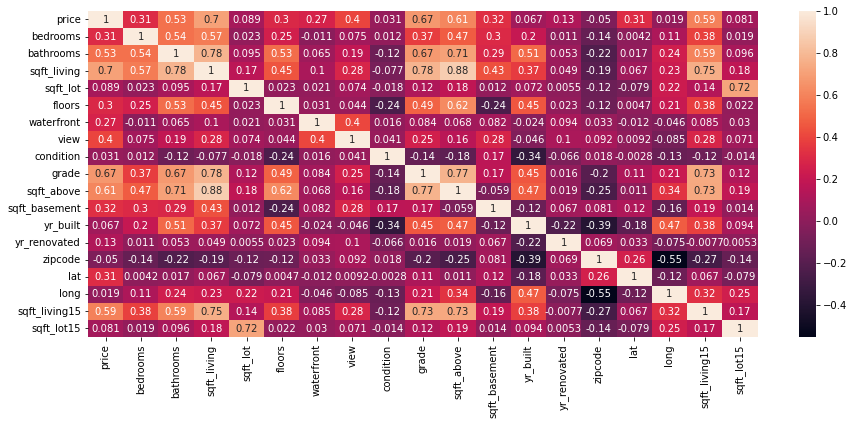

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='price'>

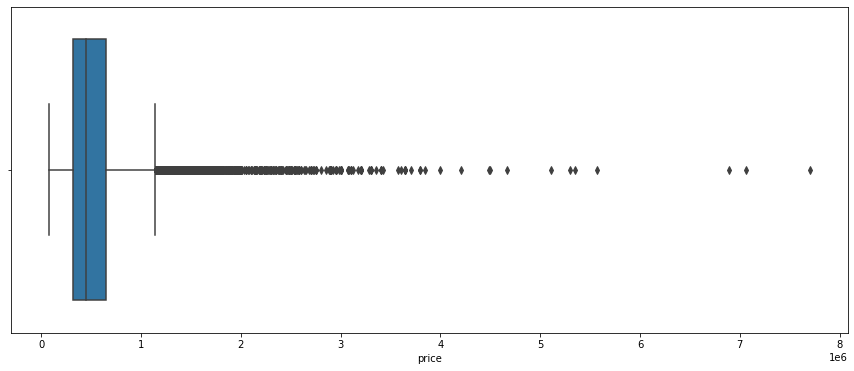

In [33]:
plt.figure(figsize=(15,6))
sns.boxplot(df['price'],orient='h')

### Inference

We thoroughly examined the "houseprice_data.csv" dataset, obtained from Canvas, which contains details on house sales in King County, USA. With 18 features, including "price," we initiated our analysis with data quality in mind.

**Data Inspection:** The dataset initially comprised 21,613 records, representing unique property transactions also there are categircals and numerical columns. We carefully reviewed the data for any anomalies.

**Data Cleaning:** We detected and removed five duplicate records as well as  anomalies leaving us with 20,667 records. Remarkably, no missing values were found, ensuring data completeness.

There exist outliers but we can't say anything about them as we don't know if they are valid or are as a result of wrong data entry.


# Feature Enginnering

We could scale the numerical features so that our model don't become bias on the bigger values

In [34]:
#Seperate the features from target

X=df.iloc[:,1:]

In [35]:
features=X.columns

features=list(features)

In [36]:
#Create list for mse and r2_score

mse_scores=[]
r2_scores=[]
models=[]

## Tweaking of features

In [37]:
def tweaking_features():

    num_feat=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','view',
        'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

    cat_feat=['waterfront','zipcode']
    
     # Copy the features list to avoid modifying the original list
    updated_features = features.copy()

    for i in range (len(features)):
        
        #Display the feature
        print("The current numerical features are ",num_feat)
        print("The current categorical features are ",cat_feat)

        from sklearn.preprocessing import StandardScaler
        scaler=StandardScaler()

        X=df[updated_features]
        y=df.iloc[:,0]

        #import train test split function
        from sklearn.model_selection import train_test_split

        #Splitting the dataset into train and test data
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

        X_train[num_feat]=scaler.fit_transform(X_train[num_feat])
        X_test[num_feat]=scaler.transform(X_test[num_feat])

        #import the linear regression
        from sklearn.linear_model import LinearRegression 

        #Create an instance
        model=LinearRegression()


        #Fit the model
        model.fit(X_train,y_train)

        #make prediction on test data
        y_pred = model.predict(X_test)

        from sklearn.metrics import  r2_score, mean_squared_error
        r_score=round(r2_score(y_test,y_pred),4)
        mse=round(mean_squared_error(y_test,y_pred),3)

        r2_scores.append(r_score)
        mse_scores.append(mse)
        models.append(f"m{i+1}")

        print(f"Instance {i+1}")
        print("The r2_score is: ",r_score)
        print("The mean_squared_error is: ",mse)
        
         # Select the feature to be removed in this iteration
        removed = updated_features.pop(-1)

        if removed in num_feat:
            num_feat.remove(removed)
        else:
            cat_feat.remove(removed)
        
        print()


In [38]:
#Call the function

tweaking_features()

The current numerical features are  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
The current categorical features are  ['waterfront', 'zipcode']
Instance 1
The r2_score is:  0.7071
The mean_squared_error is:  40612271125.174

The current numerical features are  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15']
The current categorical features are  ['waterfront', 'zipcode']
Instance 2
The r2_score is:  0.7069
The mean_squared_error is:  40643982290.59

The current numerical features are  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']
The current categorical features are  ['waterfront', '

## Effectiveness of model

In [39]:
#Create a dictionary to hold the metrics

metrics={"r2_scores": r2_scores,
        "mse": mse_scores,
         "models":  models
    }

In [40]:
#Load it into a dataframe

data=pd.DataFrame(metrics)

In [41]:
#sort the values

top5=data.sort_values(by=['r2_scores'],ascending=False).head(5)

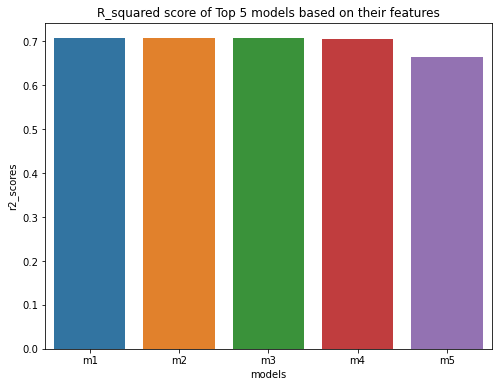

In [42]:
plt.figure(facecolor='white',figsize=(8,6))
sns.barplot(y=top5['r2_scores'],x=top5['models'])
plt.title("R_squared score of Top 5 models based on their features")
plt.savefig("top 5 R2.png")
plt.show()

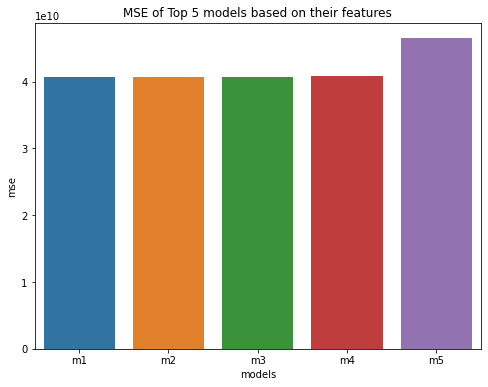

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(y=top5['mse'],x=top5['models'])
plt.title("MSE of Top 5 models based on their features")
plt.savefig("top 5 MSE.png")
plt.show()

In [44]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [45]:
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [46]:
#Removing the "floor" and "sqft basement"

features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

In [47]:
num_feat=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view',
        'condition', 'grade', 'sqft_above',
        'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X=df[features]
y=df.iloc[:,0]

#import train test split function
from sklearn.model_selection import train_test_split

#Splitting the dataset into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

X_train[num_feat]=scaler.fit_transform(X_train[num_feat])
X_test[num_feat]=scaler.transform(X_test[num_feat])

#import the linear regression
from sklearn.linear_model import LinearRegression 

#Create an instance
reg=LinearRegression()


#Fit the model
reg.fit(X_train,y_train)

#make prediction on test data
y_pred = reg.predict(X_test)

from sklearn.metrics import  r2_score, mean_squared_error
reg_r2=round(r2_score(y_test,y_pred),4)
reg_mse=round(mean_squared_error(y_test,y_pred),3)

print("The r2_score is: ",reg_r2)
print("The mean_squared_error is: ",reg_mse)

The r2_score is:  0.7073
The mean_squared_error is:  40575760552.595


In [49]:
reg.intercept_

61055045.89369182

In [56]:
#Compare the metrics of m1 and reg

data2={
    'model': ["m1","reg"],
    "mse": [mse_scores[0],reg_mse],
    "r2_score" :[r2_scores[0],reg_r2]
}

In [57]:
#load the data to dataframe

compare=pd.DataFrame(data2)

pd.DataFrame(data2)

,model,mse,r2_score
0,m1,4.061227e+10,0.7071
1,reg,4.057576e+10,0.7073


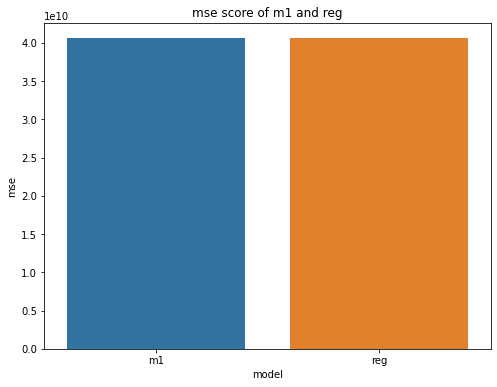

In [52]:
#Visualize the metrics 

plt.figure(figsize=(8,6))
sns.barplot(y=compare['mse'],x=compare['model'])
plt.title("mse score of m1 and reg")
plt.savefig("compare mse.png")
plt.show()

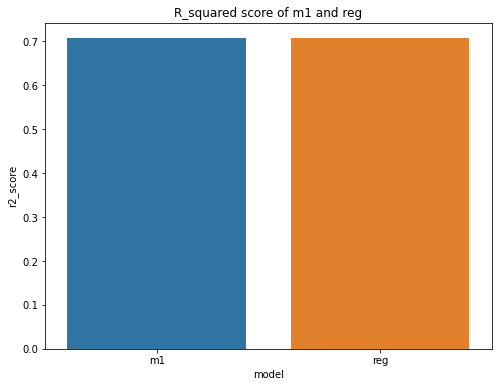

In [53]:
#Visualize the metrics 

plt.figure(figsize=(8,6))
sns.barplot(y=compare['r2_score'],x=compare['model'])
plt.title("R_squared score of m1 and reg")
plt.savefig("compare r2_score.png")
plt.show()

In [54]:
df[features]

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21605,4,2.50,2520,6023,0,0,3,9,2520,2014,0,98056,47.5137,-122.167,2520,6023
21606,4,3.50,3510,7200,0,0,3,9,2600,2009,0,98136,47.5537,-122.398,2050,6200
21609,4,2.50,2310,5813,0,0,3,8,2310,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,0,0,3,7,1020,2009,0,98144,47.5944,-122.299,1020,2007


In [58]:
y

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
           ...    
21605     610685.0
21606    1010000.0
21609     400000.0
21610     402101.0
21612     325000.0
Name: price, Length: 20667, dtype: float64

In [59]:
prediction = reg.predict(np.array([[4,1,1208,4590,0,2,4,5,1208,2013,0,98178,47.5114,-112.253,1203,5650]]))

In [60]:
prediction

array([33010014.89239468])

In [61]:
print('Print a single value: ',format(prediction[0],',.2f'))

Print a single value:  33,010,014.89


**Include as many features as you can. Does the model improve?**

In my analysis, I tried including various features and also removing some from my model. What I found is that the model performs best when i removed "floor" and "" feature. The R-squared (R2) score is highest and the Mean Squared Error (MSE) is lowest when I did this.

**How will you assess the effectiveness of the model?**

Since i can't fine-tune the Linear Regression (LR) model by adjusting hyperparameters like it's possible in other robust models, i accessed the effectiveness via the (R2) score and (MSE) metrics.

**How could you make further improvements?**

To make the model better, it will be a good application to make use of different model known as ensembling method.This ensembling approach helps make sure the predictions are as good as they can be most especially when our data can't be captured well by smaller models.

**What can you conclude about your model?**

In conclusion, the Linear Regression (LR) model works best when the "floor" and "sqft_basement" feature is removed. When I tried removing some more  features or adding all features, the model's performance actually worsened which suggest that it yeilds effective and accurate predicting power when the floor and sqft_basement features are excluded.